<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab06_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Text Mining
## Scott Spurlock
### 3/1/2021

### What are your impressions of data mining and machine learning?
I think they are extremely interesting and increasingly important for lots of applications that can help improve people's lives.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# DMML student survey data
file_link = 'https://drive.google.com/uc?export=download&id=1u_8wAeimcuUtZSgcDhvhd0SK8KE5fHS5'
df = pd.read_csv(file_link)
df.tail(11)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop bad rows
df_clean = df.dropna(axis=0)
df_clean.tail()

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


In [4]:
impressions = df_clean['Impressions']
impressions

0     buzzwordy, but needed. I'm excited to learn de...
1                          I don’t know much about them
2     These two concepts seem intimately intertwined...
3     To me, data mining is being able to harvest da...
4     I believe data mining is looking through code ...
5                   I have positive impressions of them
6                             Innovative, ever-evolving
7     I find it fascinating how data mining is becom...
8                               I think its interesting
9     A little nervous but willing to put in the wor...
10    Automating processes using large data sets to ...
11    It is about taking large, unorganized data and...
12    I think it’s mind boggling that humans have be...
13    Mostly related to artificial intelligence and ...
14    I heard that the course is very interesting an...
15    I'm excited to learn about data mining. I love...
16    Like everything, data mining and machine learn...
17    Using python dynamically to scrape data an

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
stop_list = ['a', 'an', 'the', 'it', 'is', 'i', 'and', 'or', 'am', 'are', 'of', 'on', 'to', 'but', 'be', 'that', 'with']
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list, max_features=500)
data_counts = count_vect.fit_transform(impressions)
print(data_counts.shape)
print(count_vect.get_feature_names())
data_counts.todense()

(24, 223)
['ability', 'able', 'about', 'accuracy', 'aid', 'algorithm', 'amazon', 'analysis', 'analytics', 'analyze', 'answers', 'applying', 'around', 'artificial', 'assume', 'assuming', 'automating', 'bad', 'based', 'become', 'becoming', 'been', 'being', 'believe', 'big', 'bit', 'boggling', 'both', 'business', 'buzzwordy', 'by', 'can', 'capable', 'centered', 'cleaning', 'code', 'coding', 'comes', 'completing', 'computer', 'computers', 'concepts', 'condition', 'constructing', 'cool', 'course', 'crawling', 'curious', 'data', 'databases', 'decisions', 'deeper', 'degree', 'determine', 'discipline', 'dm', 'do', 'don', 'dynamically', 'efficiency', 'efficient', 'ever', 'everything', 'evolving', 'excited', 'experience', 'exposure', 'extremely', 'fascinating', 'fields', 'financial', 'find', 'fit', 'for', 'forward', 'from', 'future', 'gathering', 'get', 'good', 'had', 'hands', 'harvest', 'has', 'have', 'having', 'heard', 'helps', 'hoping', 'how', 'humans', 'important', 'impressions', 'improve', 

matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_counts)
tfidf = data_tfidf.todense()
tfidf

matrix([[0.        , 0.        , 0.14594461, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.35205268, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.42475144, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

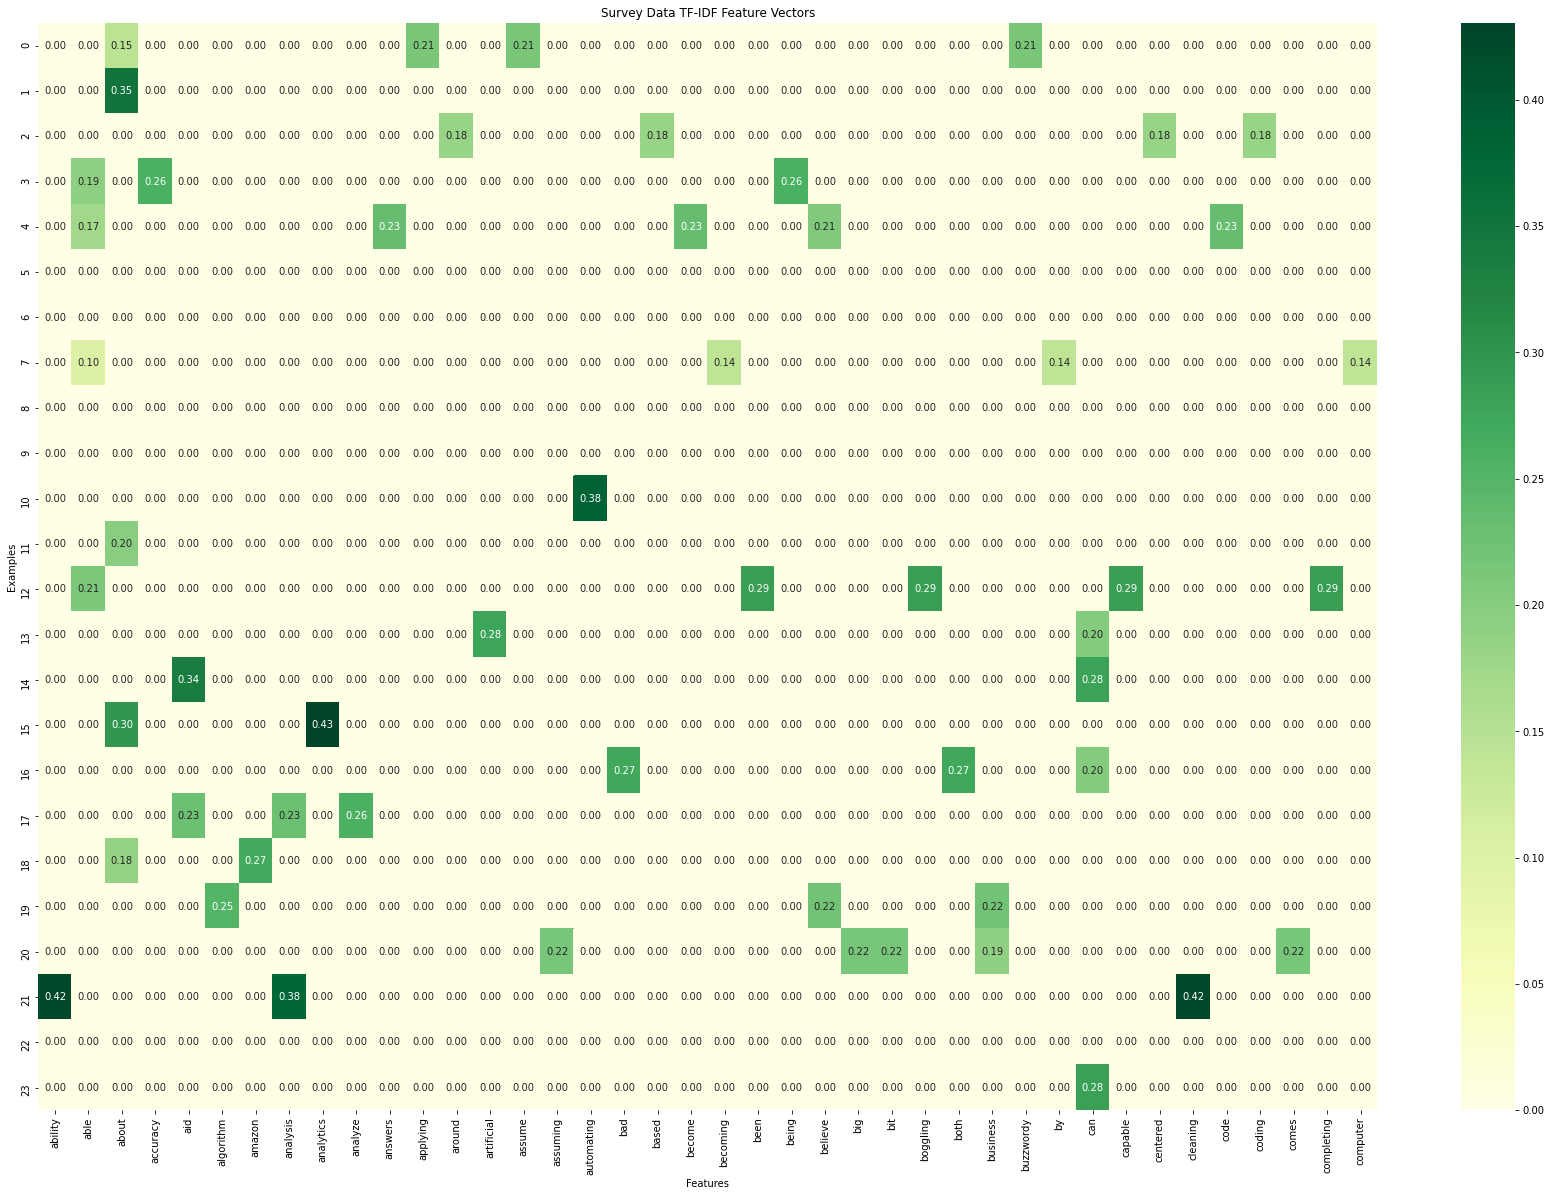

In [7]:
# Display feature vectors as a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(tfidf[:, :40], square=False, annot=True, fmt='.2f', cbar=True, cmap="YlGn",
                    xticklabels=count_vect.get_feature_names()[:40])

plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Examples')
plt.title('Survey Data TF-IDF Feature Vectors')
plt.show()

In [8]:
# Build model to return nearest neighbors
# (Not a classifier)
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

# Create the kNN model
knn = NearestNeighbors(n_neighbors=5, metric=distance.cosine, algorithm='brute')

# Fit the model to the TF-IDF feature vectors
model = knn.fit(tfidf)
model

NearestNeighbors(algorithm='brute', leaf_size=30,
                 metric=<function cosine at 0x7f5f7c7040e0>, metric_params=None,
                 n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [9]:
new_example = ["I think it's interesting and important for lots of applications that can help improve people's lives."]
new_counts = count_vect.transform(new_example).todense()
new_tfidf = tfidf_transformer.transform(new_counts)
new_tfidf = new_tfidf.todense()
new_tfidf

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.28975705, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [10]:
# Which features were non-zero?
mask = np.array(new_counts)[0] == 1
np.array(count_vect.get_feature_names())[mask]


array(['can', 'for', 'important', 'improve', 'interesting', 'lots',
       'people', 'think'], dtype='<U13')

In [11]:
# Which feature had the highest score?
idx = np.argmax(new_tfidf)
feat = count_vect.get_feature_names()[idx]
print('Highest valued feature: {}, (TF-IDF score: {:.2f})'.format(feat, new_tfidf[0, idx]))

Highest valued feature: important, (TF-IDF score: 0.39)


In [12]:
distance, neighbor_idx = model.kneighbors(new_tfidf)
distance

array([[0.6677114 , 0.67436117, 0.83570799, 0.85739327, 0.90911977]])

In [13]:
for i in range(5):
  d = distance[0][i]
  impressions_idx = neighbor_idx[0][i]
  txt = impressions[impressions_idx]
  print('{:d}) {:.2f}: {}'.format(i+1, d, txt))

1) 0.67: I think its interesting
2) 0.67: I heard that the course is very interesting and can aid with lots of research topics.
3) 0.84: I think data mining is very powerful, and can be used in a good and meaningful way.
4) 0.86: Like everything, data mining and machine learning can be used for both bad and good. I'm hoping to learn of the good ways to use it :)
5) 0.91: I believe data mining is looking through code and data to try to find answers to potential questions. Machine learning is programing a machine to be able to learn and improve on its own to become more efficient.


# Challenges

In [14]:
x = count_vect.get_feature_names()
y = np.array(data_counts.todense()).sum(axis=0)

In [15]:
df = pd.DataFrame()
df['term'] = x
df['count'] = y
df = df.sort_values(by='count')
df

,term,count
0,ability,1
137,needed,1
138,nervous,1
139,not,1
140,nothing,1
...,...,...
94,in,9
113,learning,10
121,machine,10
130,mining,12


In [16]:
df = df[df['count'] > 2]
df

,term,count
79,good,3
195,topic,3
134,more,3
179,some,3
102,interesting,3
209,using,3
212,very,4
1,able,4
89,how,4
31,can,4


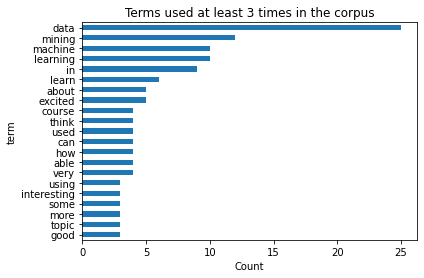

In [17]:
df.plot(y='count', x='term', kind='barh', legend=None)
plt.xlabel('Count')
plt.title('Terms used at least 3 times in the corpus')
plt.show()

## Challenge #2

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

sim_mat = cosine_similarity(data_tfidf.todense())

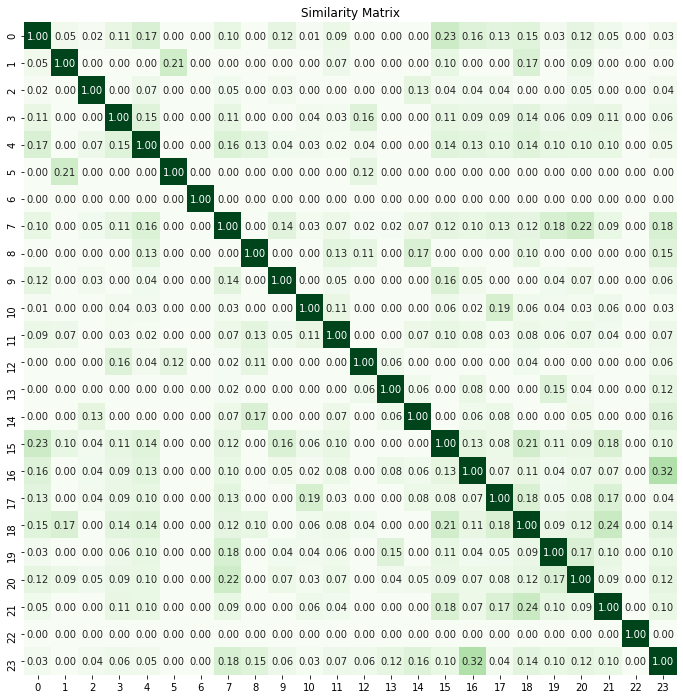

In [19]:
# Display feature vectors as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(sim_mat, square=True, annot=True, fmt='.2f', cbar=False, cmap="Greens")

# plt.xticks(rotation=90) 
# plt.xlabel('Features')
# plt.ylabel('Examples')
plt.title('Similarity Matrix')
plt.show()